# Aim of the notebook
In this notebook we will process adata and define populations

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define paths

In [2]:
path_to_write='/media/sergio/Meninges/SpatialData_formatted/'

In [3]:
adata=sc.read(path_to_write+'adata_for_velocity.h5ad')

# Define populations

In [4]:
adata.layers['raw']=adata.layers['spliced']+adata.layers['unspliced']

In [5]:
# filter, normalize 
sc.pp.filter_cells(adata,min_counts = 20)
sc.pp.filter_genes(adata,min_cells = 4)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
# pca, neighbours, umap, leiden
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors = 15 , n_pcs=0)
sc.tl.umap(adata,min_dist=0.05)
sc.tl.leiden(adata,resolution = 0.5 )
sc.tl.rank_genes_groups(adata,groupby='leiden')

/home/sergio/anaconda3/envs/xb_dev3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/sergio/anaconda3/envs/xb_dev3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/sergio/anaconda3/envs/xb_dev3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:399: Perfo

In [6]:
adata.write(path_to_write+'adata_for_velocity_processed.h5ad')

# Generate basic plots

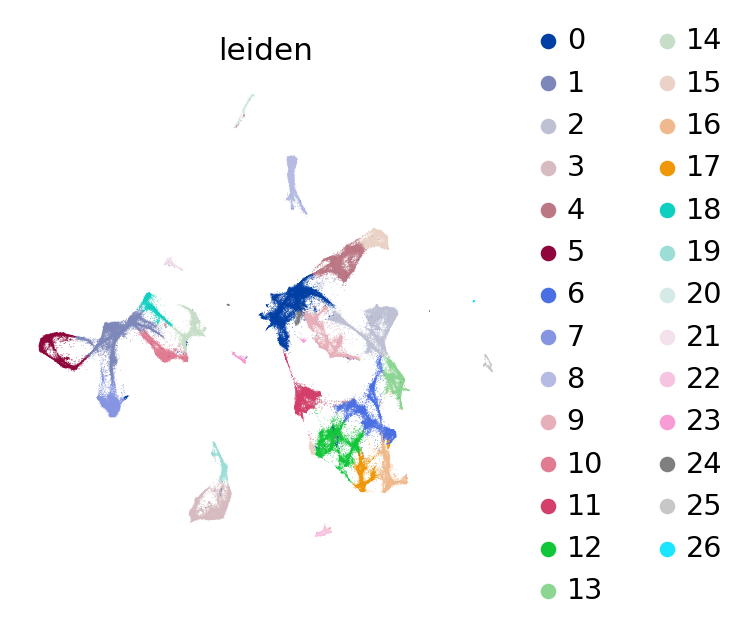

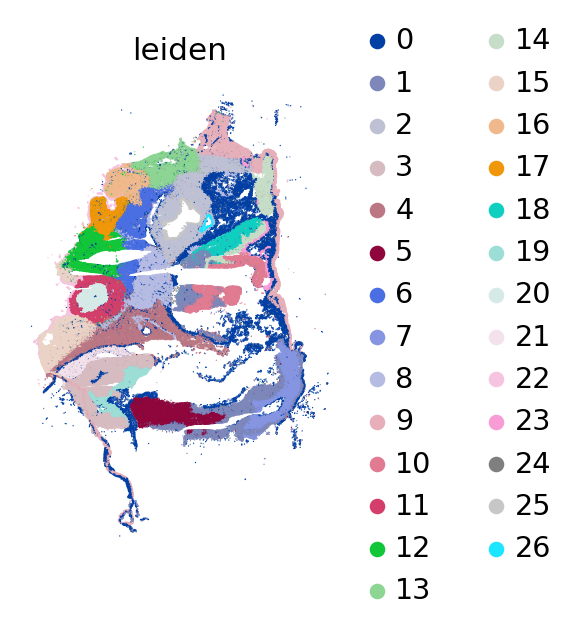

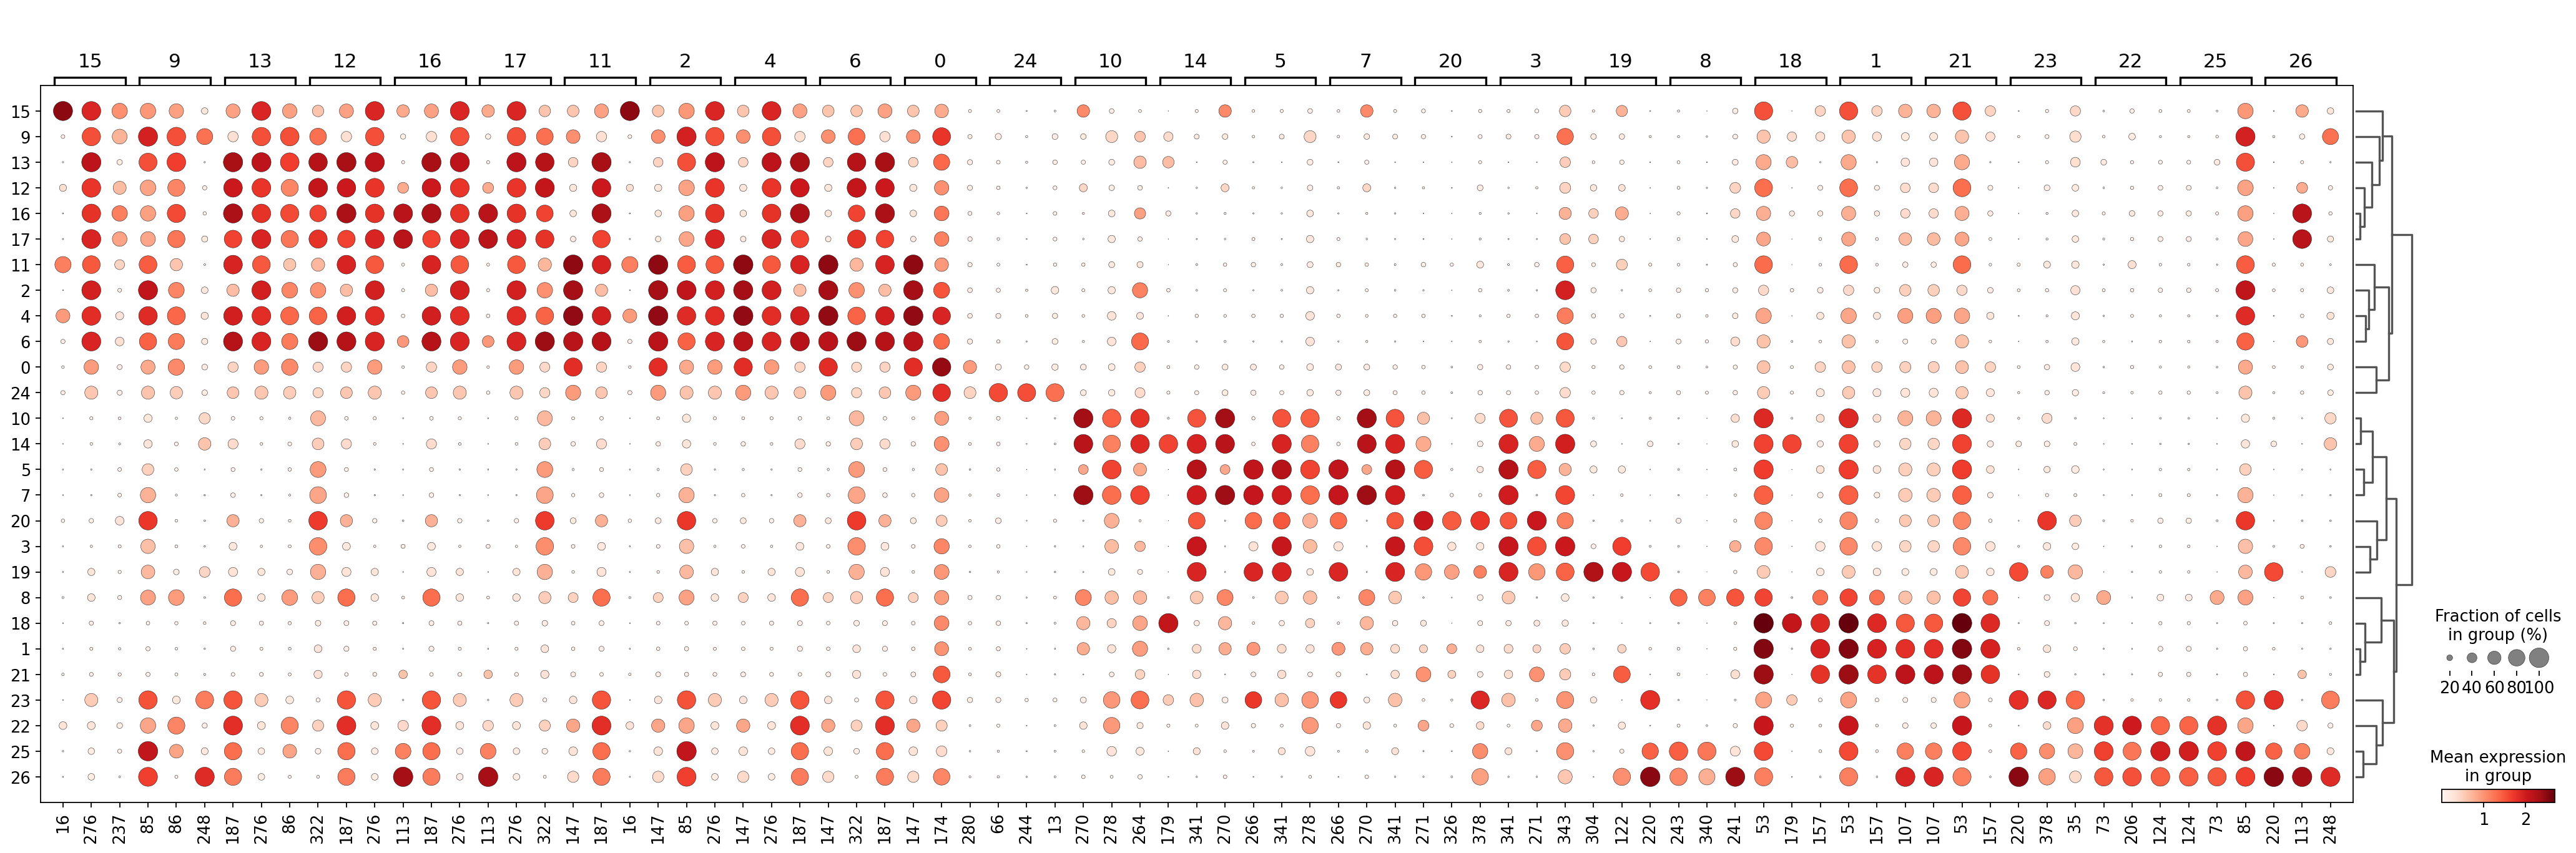

In [9]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, frameon=False, vector_friendly=True, fontsize=14, format='pdf', ipython_format='png2x')
sc.pl.umap(adata,color='leiden')
sc.pl.spatial(adata,color='leiden',spot_size=30)
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)


# Data characteristics